In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
df_new = pd.read_csv("/kaggle/input/parliament-emi/speeches_emi.csv")
df_old = pd.read_csv("/kaggle/input/parliament-emi/speeches_old_emi.csv")

/tmp/ipykernel_33/8125566.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new = pd.read_csv("/kaggle/input/parliament-emi/speeches_emi.csv")


**Plotting the German Parliamen EMI over Time**

In [4]:
print(df_new.columns)
print(df_old.columns)
#df_old.head()

Index(['id', 'session', 'electoralTerm', 'firstName', 'lastName',
       'politicianId', 'speechContent', 'factionId', 'documentUrl',
       'positionShort', 'positionLong', 'date', 'length', 'chunk_length',
       'document_vector', 'evidence_similarity', 'intuition_similarity',
       'length_bin', 'evidence_mean', 'evidence_adj', 'intuition_mean',
       'intuition_adj', 'evidence_z', 'intuition_z',
       'evidence_minus_intuition_score'],
      dtype='object')
Index(['id', 'begin', 'end', 'speechContent', 'dateDay', 'dateMonth',
       'dateYear', 'timestamp', 'length', 'chunk_length', 'document_vector',
       'evidence_similarity', 'intuition_similarity', 'length_bin',
       'evidence_mean', 'evidence_adj', 'intuition_mean', 'intuition_adj',
       'evidence_z', 'intuition_z', 'evidence_minus_intuition_score'],
      dtype='object')


In [5]:
# Selecting two columns
df_new_plot = df_new[['date', 'evidence_minus_intuition_score', 'length']]
df_old_plot = df_old[['dateYear', 'evidence_minus_intuition_score', 'length']]

In [6]:
df_new_plot['date'] = pd.to_datetime(df_new_plot['date'])

# Extract the year and create a new column 'year'
df_new_plot['date'] = df_new_plot['date'].dt.year


df_old_plot = df_old_plot.rename(columns={'dateYear': 'date'})


/tmp/ipykernel_33/1305272566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_plot['date'] = pd.to_datetime(df_new_plot['date'])
/tmp/ipykernel_33/1305272566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_plot['date'] = df_new_plot['date'].dt.year


In [7]:
df_plot = pd.concat([df_new_plot, df_old_plot], ignore_index=True)

In [8]:
df_new_plot['date'].max()

2021

Plot Together

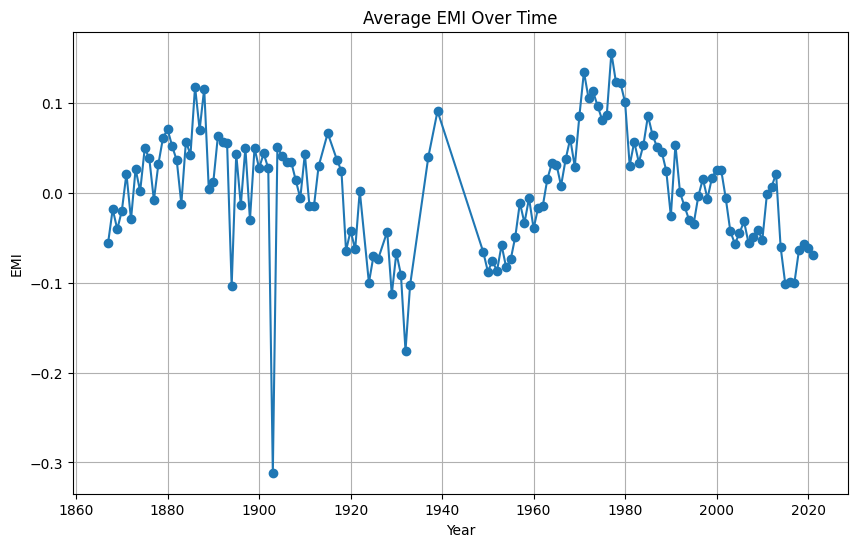

In [9]:
# Grouping by 'Date' (year) and calculating the average 'Value'
df_grouped = df_plot.groupby('date').mean().reset_index()

# Plotting the average values over time
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['evidence_minus_intuition_score'], marker='o')
plt.title('Average EMI Over Time')
plt.xlabel('Year')
plt.ylabel('EMI')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('average_emi_over_time.png')
plt.show()


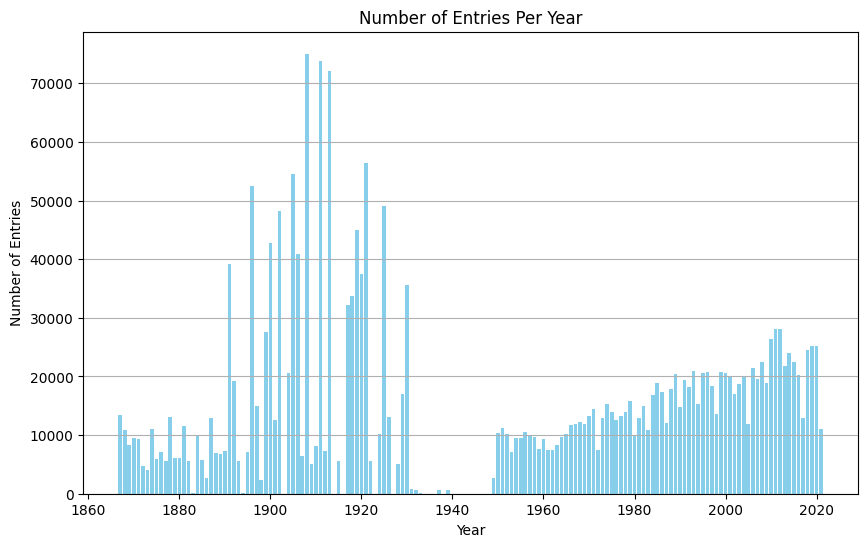

In [10]:
# Counting the number of entries per year
entries_per_year = df_plot.groupby('date').size().reset_index(name='Entries')

# Plotting the number of entries per year
plt.figure(figsize=(10, 6))
plt.bar(entries_per_year['date'], entries_per_year['Entries'], color='skyblue')
plt.title('Number of Entries Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(axis='y')
plt.savefig('entries_over_time.png')
plt.show()


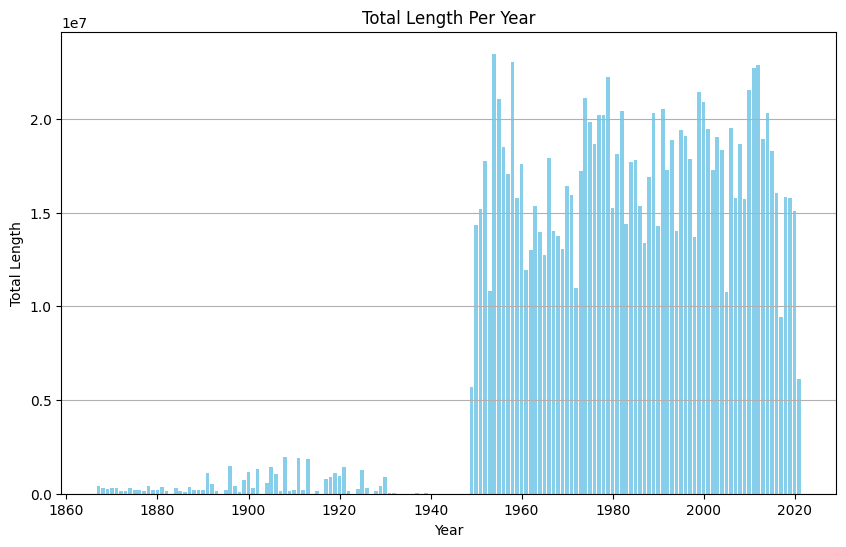

In [11]:
# Summing the lengths per year
total_length_per_year = df_plot.groupby('date')['length'].sum().reset_index()

# Plotting the total length per year
plt.figure(figsize=(10, 6))
plt.bar(total_length_per_year['date'], total_length_per_year['length'], color='skyblue')
plt.title('Total Length Per Year')
plt.xlabel('Year')
plt.ylabel('Total Length')
plt.grid(axis='y')
plt.savefig('tokens_over_time.png')
plt.show()


Plot each

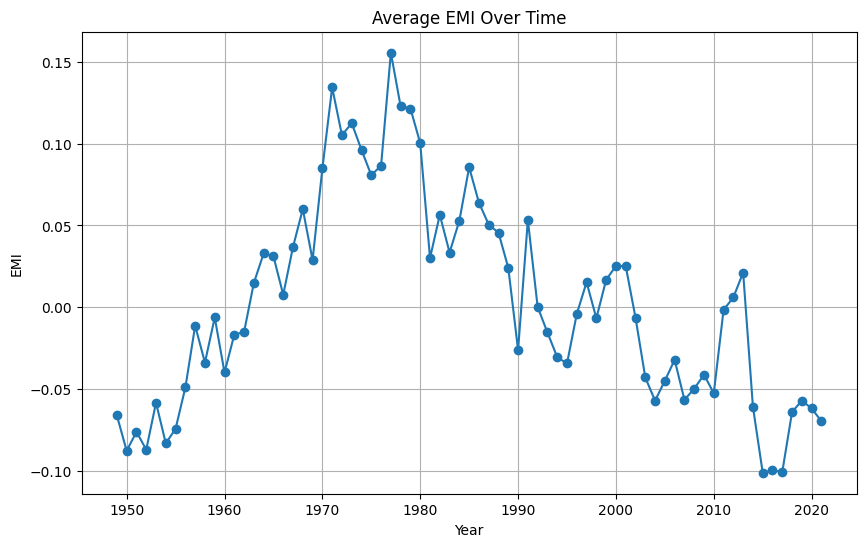

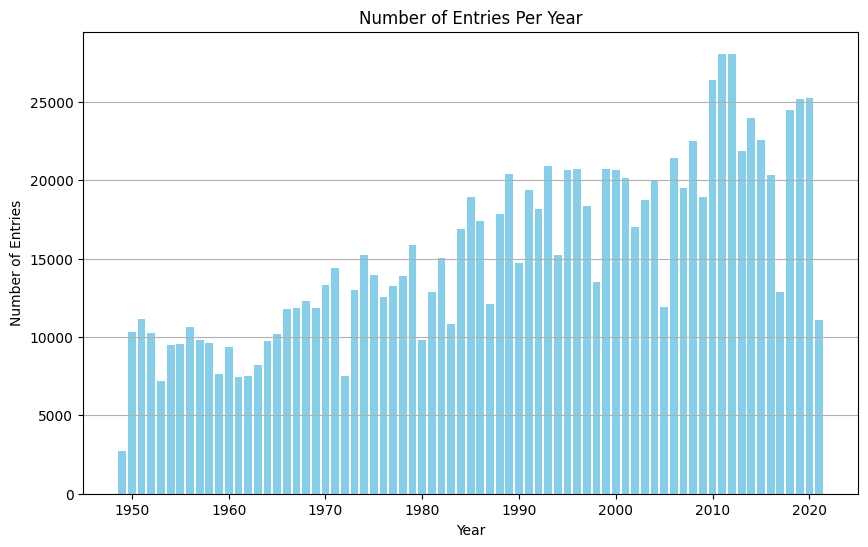

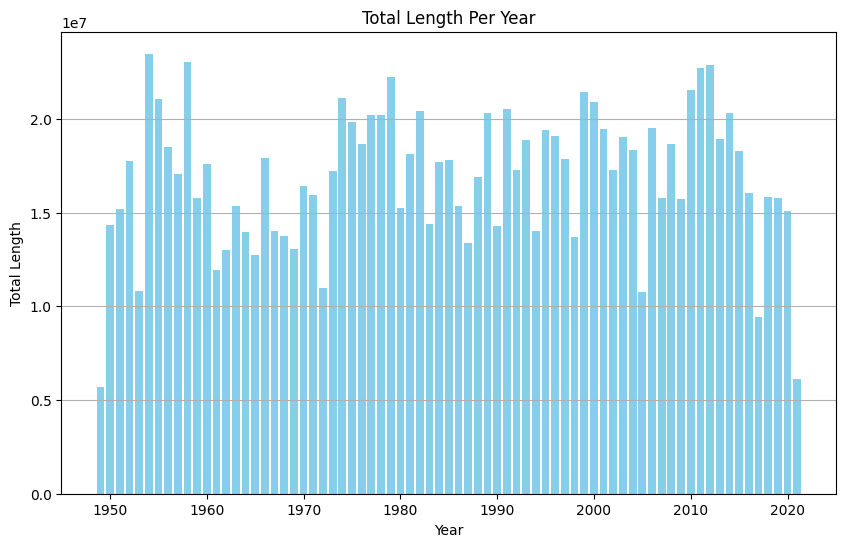

In [12]:
df_grouped = df_new_plot.groupby('date').mean().reset_index()

# Plotting the average values over time
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['evidence_minus_intuition_score'], marker='o')
plt.title('Average EMI Over Time')
plt.xlabel('Year')
plt.ylabel('EMI')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('average_emi_over_time_new.png')
plt.show()

# Counting the number of entries per year
entries_per_year = df_new_plot.groupby('date').size().reset_index(name='Entries')

# Plotting the number of entries per year
plt.figure(figsize=(10, 6))
plt.bar(entries_per_year['date'], entries_per_year['Entries'], color='skyblue')
plt.title('Number of Entries Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(axis='y')
plt.savefig('entries_over_time_new.png')
plt.show()

# Summing the lengths per year
total_length_per_year = df_new_plot.groupby('date')['length'].sum().reset_index()

# Plotting the total length per year
plt.figure(figsize=(10, 6))
plt.bar(total_length_per_year['date'], total_length_per_year['length'], color='skyblue')
plt.title('Total Length Per Year')
plt.xlabel('Year')
plt.ylabel('Total Length')
plt.grid(axis='y')
plt.savefig('tokens_over_time_new.png')
plt.show()


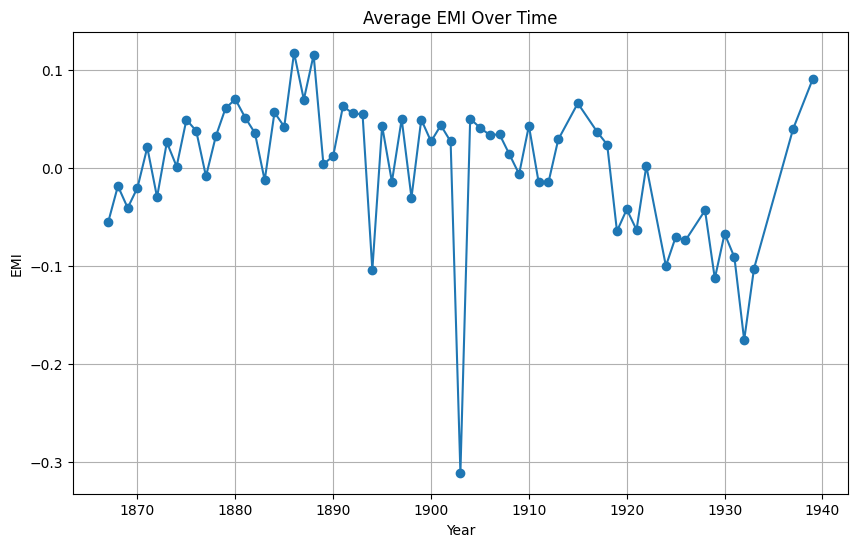

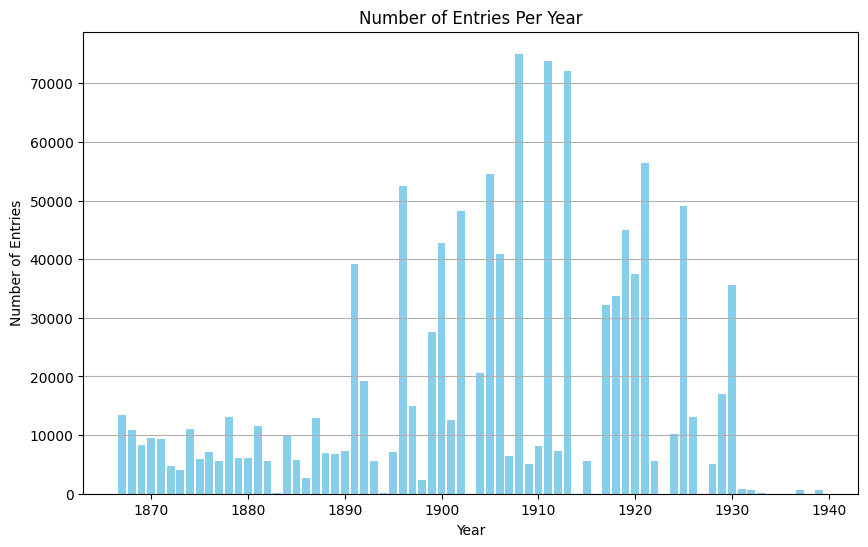

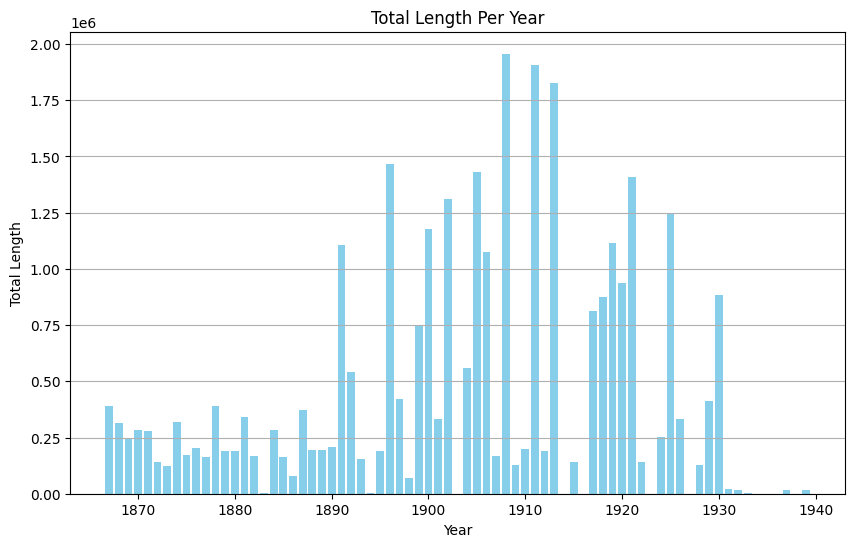

In [13]:
df_grouped = df_old_plot.groupby('date').mean().reset_index()

# Plotting the average values over time
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['evidence_minus_intuition_score'], marker='o')
plt.title('Average EMI Over Time')
plt.xlabel('Year')
plt.ylabel('EMI')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('average_emi_over_time_old.png')
plt.show()

# Counting the number of entries per year
entries_per_year = df_old_plot.groupby('date').size().reset_index(name='Entries')

# Plotting the number of entries per year
plt.figure(figsize=(10, 6))
plt.bar(entries_per_year['date'], entries_per_year['Entries'], color='skyblue')
plt.title('Number of Entries Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(axis='y')
plt.savefig('entries_over_time_old.png')
plt.show()

# Summing the lengths per year
total_length_per_year = df_old_plot.groupby('date')['length'].sum().reset_index()

# Plotting the total length per year
plt.figure(figsize=(10, 6))
plt.bar(total_length_per_year['date'], total_length_per_year['length'], color='skyblue')
plt.title('Total Length Per Year')
plt.xlabel('Year')
plt.ylabel('Total Length')
plt.grid(axis='y')
plt.savefig('tokens_over_time_old.png')
plt.show()
